## Imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

## Load Dataset

In [9]:
df = pd.read_csv("../data/raw/telco_churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Basic Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Cleaning

In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(inplace=True)

In [12]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

## Plot 1 — Churn Distribution (Target Balance)

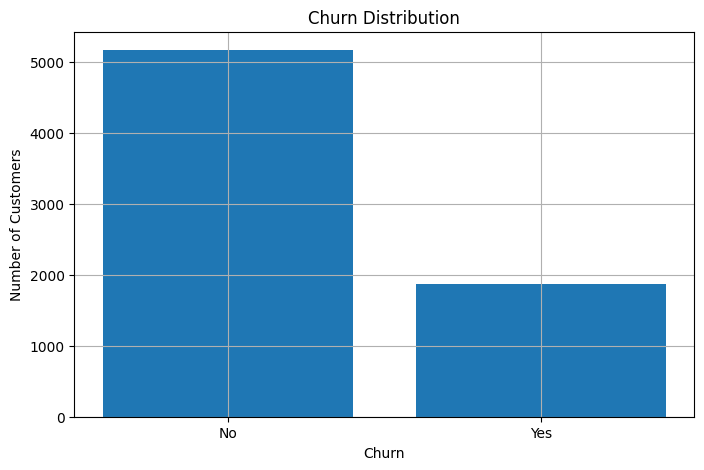

In [13]:
churn_counts = df["Churn"].value_counts()

plt.bar(churn_counts.index, churn_counts.values)
plt.xticks([0, 1], ["No", "Yes"])
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

## Plot 2 — Tenure Distribution

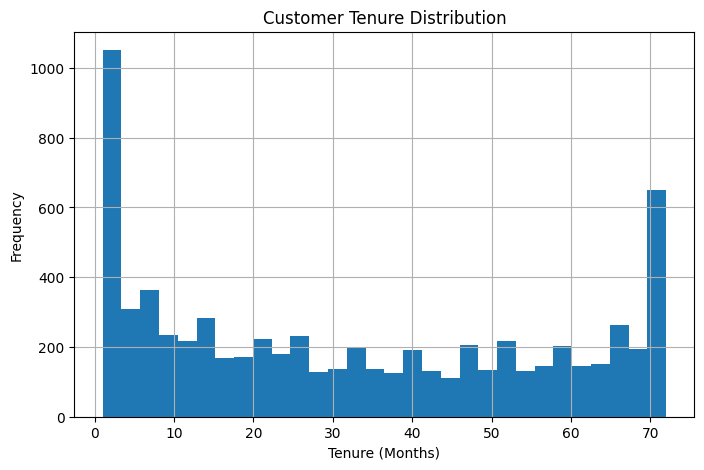

In [14]:
plt.hist(df["tenure"], bins=30)
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

## Plot 3 — Tenure vs Churn

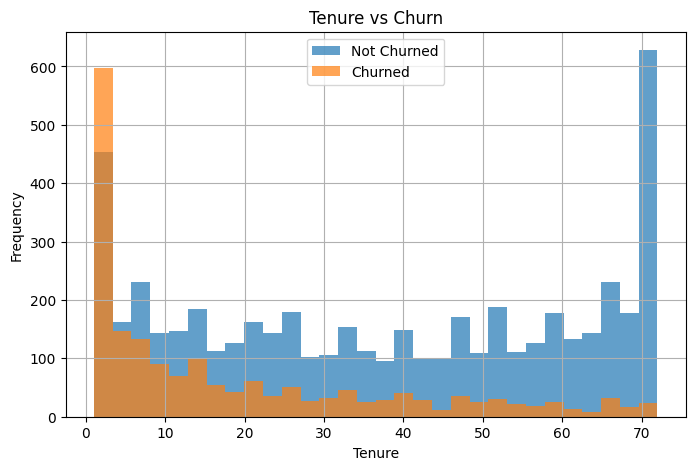

In [15]:
churned = df[df["Churn"] == 1]["tenure"]
not_churned = df[df["Churn"] == 0]["tenure"]

plt.hist(not_churned, bins=30, alpha=0.7, label="Not Churned")
plt.hist(churned, bins=30, alpha=0.7, label="Churned")

plt.title("Tenure vs Churn")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Plot 4 — Monthly Charges Distribution

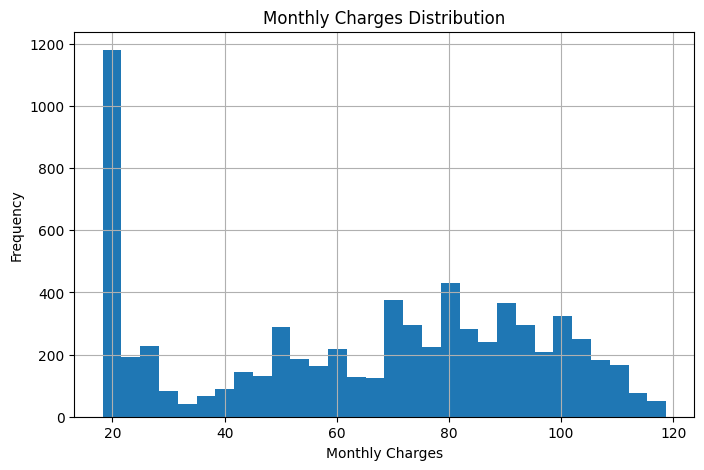

In [16]:
plt.hist(df["MonthlyCharges"], bins=30)
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

## Plot 5 — Monthly Charges vs Churn

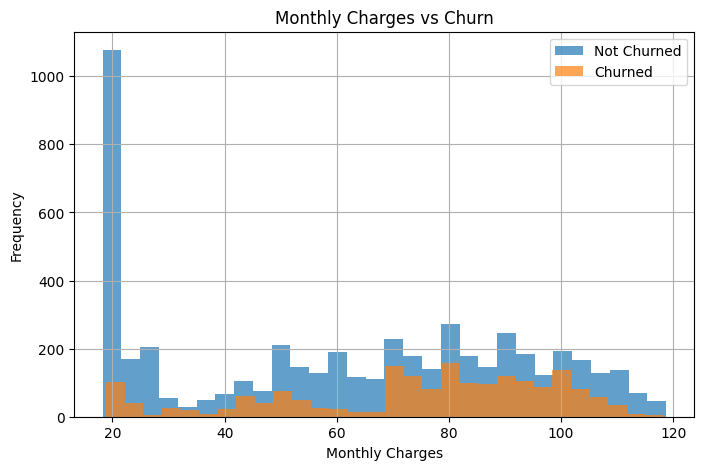

In [17]:
plt.hist(df[df["Churn"] == 0]["MonthlyCharges"], bins=30, alpha=0.7, label="Not Churned")
plt.hist(df[df["Churn"] == 1]["MonthlyCharges"], bins=30, alpha=0.7, label="Churned")

plt.title("Monthly Charges vs Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Plot 6 — Contract Type vs Churn

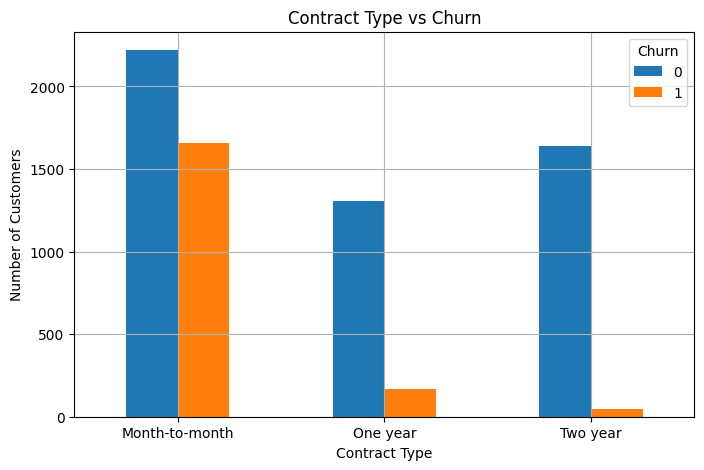

In [18]:
contract_churn = pd.crosstab(df["Contract"], df["Churn"])
contract_churn.plot(kind="bar")

plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

## Plot 7 — Correlation Heatmap (Numerical Only)

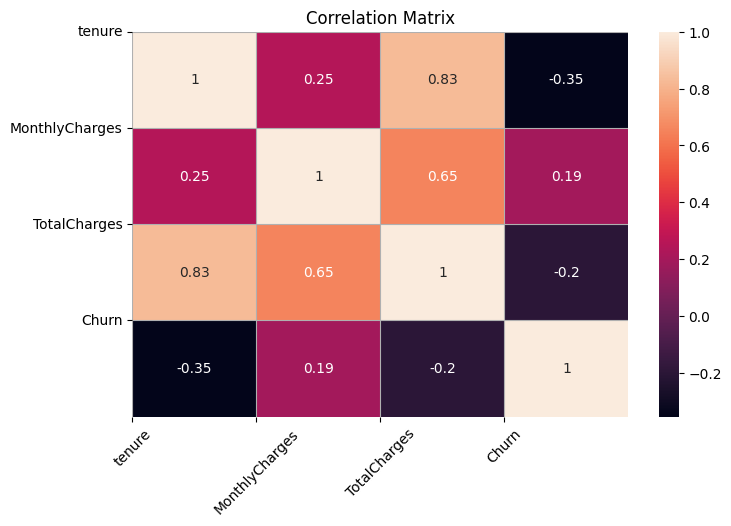

In [22]:
corr = df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]].corr()

sns.heatmap(corr, annot=True)
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

## Key EDA Insights

- Customer churn is higher among users with shorter tenure
- Month-to-month contracts show significantly higher churn
- Higher monthly charges correlate with increased churn risk
- The dataset shows mild class imbalance, requiring careful model evaluation